In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/horse-or-human_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
base_dir = '/tmp/horse-or-human_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training horses pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with our training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')

# Directory with our test horses pictures
val_horses_dir = os.path.join(test_dir, 'horses')
# Directory with our test humans pictures
val_humans_dir = os.path.join(test_dir, 'humans')

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
model.summary()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [23]:
history = model.fit(
      train_generator,
      steps_per_epoch=51,  # 1027 images = batch_size * steps
      epochs=10,
      validation_data=test_generator,
      validation_steps=50)

Epoch 1/10
51/51 [==============================] - 56s 1s/step - loss: 0.0034 - acc: 0.9990 - val_loss: 1.5883 - val_acc: 0.8477
Epoch 2/10
51/51 [==============================] - 55s 1s/step - loss: 0.0016 - acc: 1.0000 - val_loss: 2.3787 - val_acc: 0.7852
Epoch 3/10
51/51 [==============================] - 56s 1s/step - loss: 6.6561e-04 - acc: 1.0000 - val_loss: 2.9260 - val_acc: 0.7734
Epoch 4/10
51/51 [==============================] - 57s 1s/step - loss: 0.0178 - acc: 0.9960 - val_loss: 3.1908 - val_acc: 0.7500
Epoch 5/10
51/51 [==============================] - 57s 1s/step - loss: 1.5998e-04 - acc: 1.0000 - val_loss: 3.4110 - val_acc: 0.7461
Epoch 6/10
51/51 [==============================] - 56s 1s/step - loss: 6.2840e-04 - acc: 1.0000 - val_loss: 3.0210 - val_acc: 0.7891
Epoch 7/10
51/51 [==============================] - 58s 1s/step - loss: 7.8093e-05 - acc: 1.0000 - val_loss: 3.6393 - val_acc: 0.7500
Epoch 8/10
51/51 [==============================] - 55s 1s/step - loss: 0.

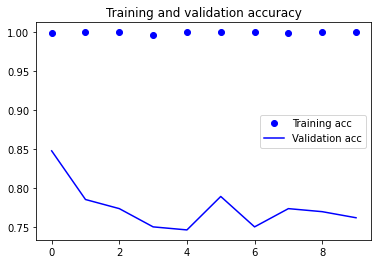

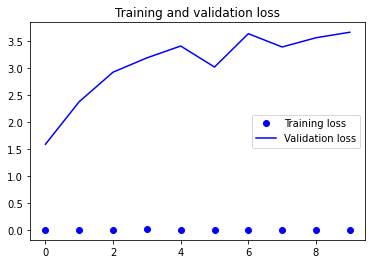

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()